In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ary = np.array([1,2,3,4,5])
ary_standardised = (ary-ary.mean())/ary.std()
ary_standardised

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(X_train.shape)

(112, 4)


In [4]:
print("mean : ",X_train.mean(axis=0))
print("standard deviation : ", X_train.std(axis=0))

mean :  [5.88660714 3.05178571 3.79642857 1.22232143]
standard deviation :  [0.86741565 0.43424445 1.79264014 0.77916047]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_scaled_train = scaler.transform(X_train)

In [8]:
print(X_scaled_train.shape)

(112, 4)


In [9]:
print("mean : ",X_scaled_train.mean(axis=0))
print("standard deviation : ",X_scaled_train.std(axis=0))

mean :  [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17  2.57730345e-17]
standard deviation :  [1. 1. 1. 1.]


In [10]:
X_test_scaled = scaler.transform(X_test)
print("mean : ",X_test_scaled.mean(axis=0))
#print("standard deviation : ",X_test_scaled.std(axis=0))

mean :  [-0.19692712  0.0201283  -0.08315118 -0.11983932]


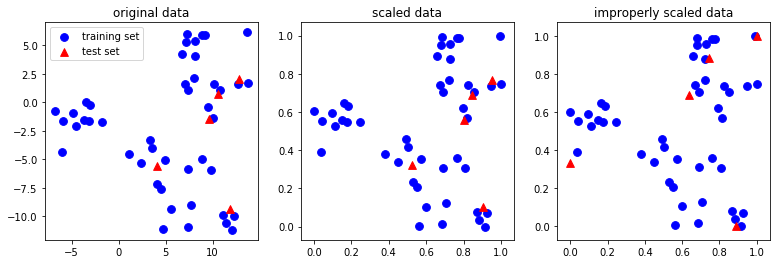

In [11]:
from figures import plot_relative_scaling
plot_relative_scaling()

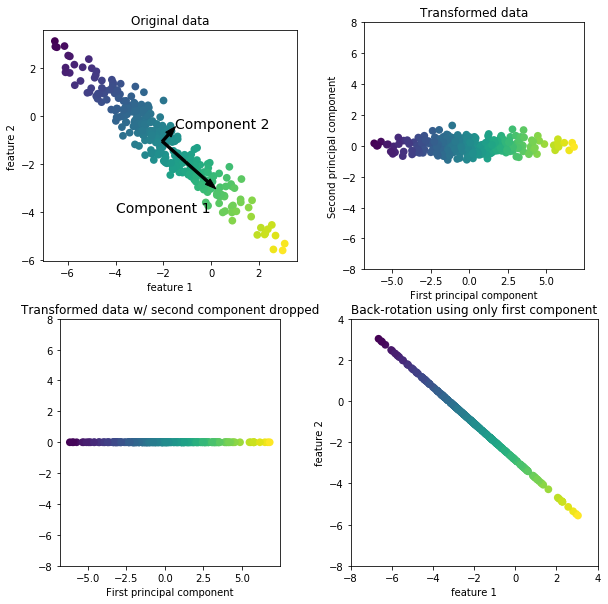

In [12]:
# starting up with PCA

from figures import plot_pca_illustration
plot_pca_illustration()

Text(0,0.5,'feature 2')

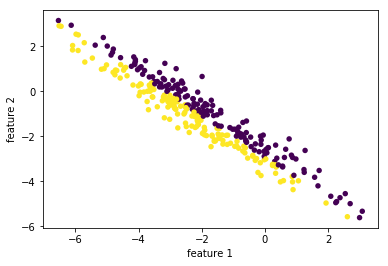

In [14]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))

X_blob = np.dot(X_, rnd.normal(size=(2,2))) + rnd.normal(size=2)

y = X_[:,0]>0

plt.scatter(X_blob[:,0], X_blob[:,1], c=y, linewidths=0, s=30)

plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [16]:
from sklearn.decomposition import PCA
pca = PCA()

In [17]:
pca.fit(X_blob)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
X_pca = pca.transform(X_blob)

Text(0,0.5,'feature 2')

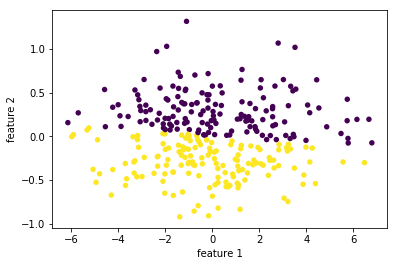

In [19]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=30, linewidths=0)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [20]:
pca = PCA(n_components=1).fit(X_blob)

In [21]:
print(X_blob.shape)

(300, 2)


In [24]:
pca.transform(X_blob).shape  # reduced dimension

(300, 1)

In [25]:
# visualising iris dataset using 2 components

from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
X,y = iris.data, iris.target

In [28]:
n_samples, n_features = X.data.shape
print(X.data.shape)

(150, 4)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [33]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=2)
pca_iris.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca_iris.transform(X_train).shape

(112, 2)

In [35]:
print(X_train.shape)

(112, 4)


In [36]:
X_iris_pca = pca_iris.transform(X_train)

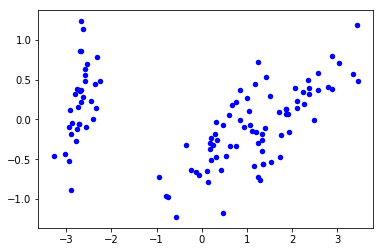

In [38]:

plt.scatter(X_iris_pca[:,0], X_iris_pca[:,1], c='blue', s=30, linewidths=0)


In [41]:
X_train_pca = pca_iris.transform(X_train)
X_test_pca = pca_iris.transform(X_test)

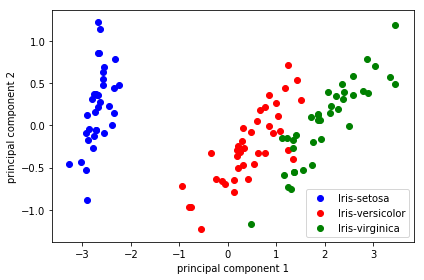

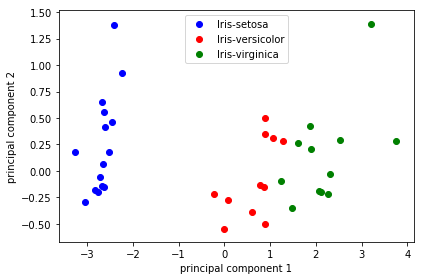

In [43]:
for X,y in zip((X_train_pca, X_test_pca), (y_train, y_test)):
    
    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green'))):
        
        plt.scatter(X[y==i,0], X[y==i, 1], c=annot[1], label=annot[0])
        
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()